# Assigning additive DMS phenotypes to 10x data

In [1]:
import os
import tempfile
cache_dir = tempfile.mkdtemp()
os.environ['XDG_CACHE_HOME'] = cache_dir
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_AV1 = "data/10x/Timecourse_Novaseqvdj/Data/AV1_VDJ_res/filtered_contig_annotations.csv"
data_AV2 = "data/10x/Timecourse_Novaseqvdj/Data/AV2_VDJ_res/filtered_contig_annotations.csv"
data_AV3 = "data/10x/Timecourse_Novaseqvdj/Data/AV3_VDJ_res/filtered_contig_annotations.csv"
data_10wk = "data/10x/10week/filtered_contig_annotations.csv"

final_variant_scores = "data/dms/final_variant_scores.csv"
dms_sites = "data/dms/CGGnaive_sites.csv"
outbase = "output/10x/"

metadata_sheet = "data/10x/Timecourse_Novaseqvdj/AV_VDJ_GEX_metadata.xlsx"
metadata_10wk_sheet = "data/10x/10week/AV10.GC_metadata.xlsx"

In [3]:
# Parameters
data_AV1 = "data_AV1"
data_AV2 = "data_AV2"
data_AV3 = "data_AV3"
data_10wk = "data_10wk"
final_variant_scores = "final_variant_scores.csv"
dms_sites = "CGGnaive_sites.csv"
metadata_sheet = "AV_VDJ_GEX_metadata.xlsx"
metadata_10wk_sheet = "AV10.GC_metadata.xlsx"
outbase = "."


In [4]:
output_dir = f"{outbase}"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

## Load data

In [5]:
dfs = (
    pd.read_csv(data_AV1),
    pd.read_csv(data_AV2),
    pd.read_csv(data_AV3),
    pd.read_csv(data_10wk)
    )
for i in range(len(dfs)):
    dfs[i]['library'] = i + 1
df = pd.concat(dfs).reset_index(drop=True)

df

,barcode,is_cell,contig_id,high_confidence,length,chain,v_gene,d_gene,j_gene,c_gene,...,cdr3_nt,fwr4,fwr4_nt,reads,umis,raw_clonotype_id,raw_consensus_id,exact_subclonotype_id,library,sequence
0,AAACCTGAGAATCTCC-1,True,AAACCTGAGAATCTCC-1_contig_1,True,504,IGK,IGKV6-15,NaN,IGKJ4,IGKC,...,TGTCAGCAATATAACAGCTATCCTCTCACGTTC,GSGTKLEIK,GGCTCGGGGACTAAGCTAGAAATAAAAC,1805,41,clonotype1,clonotype1_consensus_2,1999,1,NaN
1,AAACCTGAGAATCTCC-1,True,AAACCTGAGAATCTCC-1_contig_2,True,527,IGH,IGHV3-8,NaN,IGHJ1,IGHG2B,...,TGTGCAAGGGACTTCGATGTCTGG,GAGTTVTVSS,GGCGCAGGGACCACGGTCACCGTCTCCTCAG,92,6,clonotype1,clonotype1_consensus_1,1999,1,NaN
2,AAACCTGAGATGTTAG-1,True,AAACCTGAGATGTTAG-1_contig_1,True,671,IGH,IGHV3-8,NaN,IGHJ1,IGHM,...,TGTGCAAGGGACTTCGATGTCTGG,GAGTTVTVSS,GGCGCAGGGACCACGGTCACCGTCTCCTCAG,132,9,clonotype1,clonotype1_consensus_1,1569,1,NaN
3,AAACCTGAGATGTTAG-1,True,AAACCTGAGATGTTAG-1_contig_2,True,525,IGK,IGKV6-15,NaN,IGKJ4,IGKC,...,TGTCAGCAATATAACAGCTATCCTCCCACGTTC,GSGTKLEIK,GGCTCGGGGACTAAGCTAGAAATAAAAC,2069,53,clonotype1,clonotype1_consensus_2,1569,1,NaN
4,AAACCTGAGCCGCCTA-1,True,AAACCTGAGCCGCCTA-1_contig_1,True,531,IGK,IGKV6-15,NaN,IGKJ4,IGKC,...,TGTCAGCAATATAACAGCTATCCTCTCACGTTC,GSGTKLEIK,GGCTCGGGGACTAAGCTAGAAATAAAAC,2413,55,clonotype1,clonotype1_consensus_2,26,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38960,TTTGTCATCTCAAACG-1,True,TTTGTCATCTCAAACG-1_contig_2,True,518,IGK,IGKV2-137,NaN,IGKJ4,IGKC,...,TGTATGCAACATCTAGAATATCCTTTCACGTTC,GSGTKLEIK,GGCTCGGGGACAAAGTTGGAAATAAAAC,529,56,clonotype7671,clonotype7671_consensus_2,1,4,GATATTGTGATGACTCAGGCTGCACCCTCTGTACCTGTCACTCCTG...
38961,TTTGTCATCTGGAGCC-1,True,TTTGTCATCTGGAGCC-1_contig_1,True,497,IGK,IGKV14-100,NaN,IGKJ5,IGKC,...,TGTGTACAGTATGCTCAGTTTCCGCTCACGTTC,GAGTKLELK,GGTGCTGGGACCAAGCTGGAGCTGAAAC,377,40,clonotype151,clonotype151_consensus_2,1,4,GACATCCTGATGACCCAATCTCCATCCTCCATGTCTGTATCTCTGG...
38962,TTTGTCATCTGGAGCC-1,True,TTTGTCATCTGGAGCC-1_contig_2,True,669,IGH,IGHV1-72,NaN,IGHJ2,IGHD,...,TGTGCAAGAGAGGGATGGTTCATCTTTGACTACTGG,GQGTTLTVSS,GGCCAAGGCACCACTCTCACAGTCTCCTCAG,119,9,clonotype151,clonotype151_consensus_1,1,4,CAGGTCCAACTGCAGCAGCCTGGGGCTGAGCTTGTGAAGCCTGGGG...
38963,TTTGTCATCTGGGCCA-1,True,TTTGTCATCTGGGCCA-1_contig_1,True,503,IGK,IGKV6-15,NaN,IGKJ4,IGKC,...,TGTCACCAATATAAGAACTATCCTATCACGTTC,GSGTKLEIK,GGCTCGGGGACTAAACTAGAAATCAAAC,477,39,clonotype1,clonotype1_consensus_2,1286,4,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAG...


### Barcode multiplicity

Most are multiplicity two, for paired heavy and light chains from single cells.

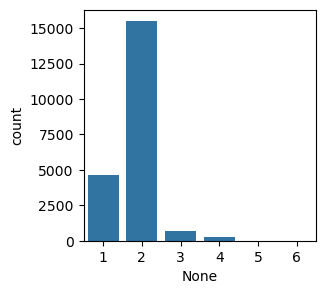

In [6]:
plt.figure(figsize=(3, 3))
sns.countplot(x=df.groupby("barcode").size())
# plt.yscale("log")
plt.show()


Filter to only barcodes with multiplicity two.

In [7]:
df = df.groupby("barcode").filter(lambda x: len(x.index) == 2)

## Load DMS data

Note: pulling DMS scores from the newer tite-seq modeling branch

In [8]:
dms_df = pd.read_csv(final_variant_scores, index_col="mutation", dtype=dict(position_IMGT=pd.Int16Dtype()))

In [9]:
# remove linker sites
dms_df = dms_df[dms_df.chain != "link"]
# add indicator for wildtype data
dms_df["WT"] = dms_df.wildtype == dms_df.mutant
assert dms_df.position_IMGT.max() < 1000
dms_df["site"] = [f"{chain}-{str(pos).zfill(3)}" for chain, pos in zip(dms_df.chain, dms_df.position_IMGT)]
dms_df

,target,wildtype,position,position_IMGT,chain,annotation,mutant,codon,single_nt,bind_CGG,delta_bind_CGG,n_bc_bind_CGG,n_libs_bind_CGG,expr,delta_expr,n_bc_expr,n_libs_expr,WT,site
mutation,,,,,,,,,,,,,,,,,,,
E1(H)A,CGG_naive,E,1,1,H,FWRH1,A,GAG,True,8.74239,0.11933,20,2,10.45318,-0.00246,20,2,False,H-001
E1(H)C,CGG_naive,E,1,1,H,FWRH1,C,GAG,False,8.60813,-0.01492,22,2,10.33348,-0.12216,22,2,False,H-001
E1(H)D,CGG_naive,E,1,1,H,FWRH1,D,GAG,True,8.63554,0.01249,18,2,10.50438,0.04874,18,2,False,H-001
E1(H)E,CGG_naive,E,1,1,H,FWRH1,E,GAG,True,8.62305,0.00000,23285,2,10.45565,0.00000,23285,2,True,H-001
E1(H)F,CGG_naive,E,1,1,H,FWRH1,F,GAG,False,8.75738,0.13433,29,2,10.34185,-0.11379,29,2,False,H-001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R128(L)S,CGG_naive,R,235,128,L,FWRL4,S,CGT,True,8.63400,0.01095,45,2,10.52908,0.07344,45,2,False,L-128
R128(L)T,CGG_naive,R,235,128,L,FWRL4,T,CGT,False,8.64386,0.02081,41,2,10.54211,0.08647,41,2,False,L-128
R128(L)V,CGG_naive,R,235,128,L,FWRL4,V,CGT,False,8.58887,-0.03418,28,2,10.49638,0.04073,28,2,False,L-128


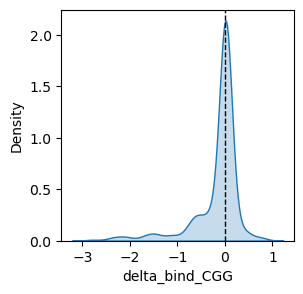

In [10]:
plt.figure(figsize=(3, 3))
sns.kdeplot(data=dms_df.query("single_nt"), x="delta_bind_CGG", fill=True)
plt.axvline(0, color="k", linestyle="--", lw=1)
plt.show()

### Load naive sequence with IMGT numbering

In [11]:
pos_df = pd.read_csv(dms_sites, dtype=dict(site=pd.Int16Dtype()), index_col="site_scFv")
pos_df

,amino_acid,chain,site,KI_codon,annotation
site_scFv,,,,,
1,E,H,1,GAG,FWRH1
2,V,H,2,GTG,FWRH1
3,Q,H,3,CAG,FWRH1
4,L,H,4,CTT,FWRH1
5,Q,H,5,CAG,FWRH1
...,...,...,...,...,...
231,L,L,124,CTA,FWRL4
232,E,L,125,GAA,FWRL4
233,I,L,126,ATA,FWRL4


In [12]:
naive_H = "".join(pos_df.query("chain == 'H'").amino_acid)
naive_H, len(naive_H)

('EVQLQESGPSLVKPSQTLSLTCSVTGDSITSGYWNWIRKFPGNKLEYMGYISYSGSTYYNPSLKSRISITRDTSKNQYYLQLNSVTTEDTATYYCARDFDVWGAGTTVTVSS',
 112)

In [13]:
# note extra R at end of scFv sequence, which we exclude below
naive_L = "".join(pos_df.query("chain == 'L'").amino_acid)[:-1]
naive_L, len(naive_L)

('DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVAWYQQKPGQSPKALIYSASYRYSGVPDRFTGSGSGTDFTLTISNVQSEDLAEYFCQQYNSYPLTFGSGTKLEIK',
 107)

### Add full length amino-acid and nucleotide sequence to the 10x data frame

In [14]:
df["aa_seq"] = df.fwr1 + df.cdr1 + df.fwr2 + df.cdr2 + df.fwr3 + df.cdr3 + df.fwr4
df["nt_seq"] = df.fwr1_nt + df.cdr1_nt + df.fwr2_nt + df.cdr2_nt + df.fwr3_nt + df.cdr3_nt + df.fwr4_nt

In [15]:
df["aa_seq"].str.contains("*", regex=False).sum()

np.int64(0)

### Distribution of sequence lengths

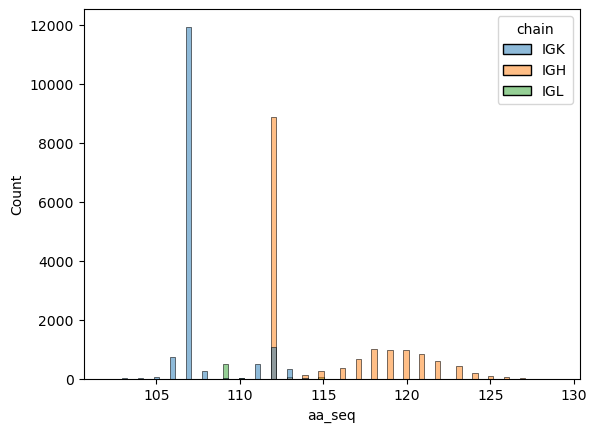

In [16]:
sns.histplot(x=df.aa_seq.str.len(), hue=df.chain)
# plt.yscale("log")
plt.show()

In [17]:
df.aa_seq.str.len().value_counts()

aa_seq
107    11934
112     9960
118      995
119      970
120      969
121      828
106      741
117      665
122      607
109      524
111      488
113      421
123      417
116      363
115      305
108      245
124      191
114      133
125       99
105       55
126       53
110       41
127       22
104       14
103       11
128        6
129        2
102        1
Name: count, dtype: int64

Filter to only sequences with the expected length of each chain

In [18]:
df = df.loc[((df.chain == 'IGH') & (df.aa_seq.str.len() == len(naive_H))) | ((df.chain == 'IGK') & (df.aa_seq.str.len() == len(naive_L)))].reset_index(drop=True)

## Assign amino-acid mutations and additive phenotypes to 10x sequences

**Note**: we do not attempt to pair heavy and light chains from the same cell, so phenotypes are assigned to each chain independently.
Under an additive model, the values for each chain can be added to get the phenotype for the BCR

In [19]:
def get_mutations(naive_aa, aa, pos_map, chain_annotation):
    assert len(naive_aa) == len(aa)
    return [f"{aa1}{pos_map[pos]}{chain_annotation}{aa2}"
            for pos, (aa1, aa2) in enumerate(zip(naive_aa, aa))
            if aa1 != aa2]

In [20]:
pos_map_H = pos_df.loc[pos_df.chain == "H", "site"].reset_index(drop=True)
pos_map_L = pos_df.loc[pos_df.chain == "L", "site"].reset_index(drop=True)

In [21]:
for idx in df.index:
     if df.chain[idx] == "IGH":
          mutations = get_mutations(naive_H, df.aa_seq[idx], pos_map_H, "(H)")          
     elif df.chain[idx] == "IGK":
          mutations = get_mutations(naive_L, df.aa_seq[idx], pos_map_L, "(L)")
     else:
          print(f"skipping unexpected chain length {df.chain[idx]} {len(df.aa_seq[idx])}")
          continue

     if "*" in mutations:
          print(f"stop codon affinity: {dms_df.delta_bind_CGG[mutations].sum()}")

     df.loc[idx, "mutations"] = ",".join(mutations)
     df.loc[idx, "n_mutations"] = len(mutations)
     df.loc[idx, "delta_bind_CGG"] = dms_df.delta_bind_CGG[mutations].sum()
     df.loc[idx, "delta_expr"] = dms_df.delta_expr[mutations].sum()

df.n_mutations = df.n_mutations.astype("Int64")

df

,barcode,is_cell,contig_id,high_confidence,length,chain,v_gene,d_gene,j_gene,c_gene,...,raw_consensus_id,exact_subclonotype_id,library,sequence,aa_seq,nt_seq,mutations,n_mutations,delta_bind_CGG,delta_expr
0,AAACCTGAGAATCTCC-1,True,AAACCTGAGAATCTCC-1_contig_1,True,504,IGK,IGKV6-15,NaN,IGKJ4,IGKC,...,clonotype1_consensus_2,1999,1,NaN,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVGWYQQKPGQSPKA...,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAG...,A40(L)G,1,0.80414,0.03813
1,AAACCTGAGAATCTCC-1,True,AAACCTGAGAATCTCC-1_contig_2,True,527,IGH,IGHV3-8,NaN,IGHJ1,IGHG2B,...,clonotype1_consensus_1,1999,1,NaN,EVQLQESGPSLVKPSQTLSLTCSVTGDSITSGYWNWIRKFPGNKLE...,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,Y67(H)S,1,-0.00061,-0.02233
2,AAACCTGAGATGTTAG-1,True,AAACCTGAGATGTTAG-1_contig_1,True,671,IGH,IGHV3-8,NaN,IGHJ1,IGHM,...,clonotype1_consensus_1,1569,1,NaN,EVQLQESGPSLVKPSQTLSLTCSVTGDSITSGYWNWIRKFPGNKLE...,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,,0,0.00000,0.00000
3,AAACCTGAGATGTTAG-1,True,AAACCTGAGATGTTAG-1_contig_2,True,525,IGK,IGKV6-15,NaN,IGKJ4,IGKC,...,clonotype1_consensus_2,1569,1,NaN,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVAWYQQKPGQSPKA...,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAG...,"G80(L)E,L116(L)P",2,-0.61374,-0.81357
4,AAACCTGAGCCGCCTA-1,True,AAACCTGAGCCGCCTA-1_contig_1,True,531,IGK,IGKV6-15,NaN,IGKJ4,IGKC,...,clonotype1_consensus_2,26,1,NaN,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVAWYQQKPGQSPKA...,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAG...,,0,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20815,TTTGTCATCCGTAGTA-1,True,TTTGTCATCCGTAGTA-1_contig_1,True,508,IGK,IGKV10-96,NaN,IGKJ2,IGKC,...,clonotype3391_consensus_2,1,4,GATATCCAGATGACACAGACTACATCCTCCCTGTCTGCCTCTCTGG...,DIQMTQTTSSLSASLGDRVTISCRASQDISNYLNWYQQKPDGTVKL...,GATATCCAGATGACACAGACTACATCCTCCCTGTCTGCCTCTCTGG...,"V3(L)Q,S7(L)T,Q8(L)T,K9(L)S,F10(L)S,M11(L)L,T1...",43,-2.57587,-1.24180
20816,TTTGTCATCCTACAGA-1,True,TTTGTCATCCTACAGA-1_contig_2,True,497,IGK,IGKV5-43,NaN,IGKJ5,IGKC,...,clonotype254_consensus_2,1,4,GATATTGTGCTAACTCAGTCTCCAGCCACCCTGTCTGTGACTCCAG...,DIVLTQSPATLSVTPGDSVSLSCRASQSISNNLHWYQQKSHESPRL...,GATATTGTGCTAACTCAGTCTCCAGCCACCCTGTCTGTGACTCCAG...,"M4(L)L,Q8(L)P,K9(L)A,F10(L)T,M11(L)L,T13(L)V,S...",43,-7.92362,-2.09844
20817,TTTGTCATCTGGAGCC-1,True,TTTGTCATCTGGAGCC-1_contig_1,True,497,IGK,IGKV14-100,NaN,IGKJ5,IGKC,...,clonotype151_consensus_2,1,4,GACATCCTGATGACCCAATCTCCATCCTCCATGTCTGTATCTCTGG...,DILMTQSPSSMSVSLGDTVSITCHASQGISSNIGWLQQKPGKSFKG...,GACATCCTGATGACCCAATCTCCATCCTCCATGTCTGTATCTCTGG...,"V3(L)L,Q8(L)P,K9(L)S,F10(L)S,T13(L)V,V15(L)L,R...",43,-3.60862,-1.17942
20818,TTTGTCATCTGGGCCA-1,True,TTTGTCATCTGGGCCA-1_contig_1,True,503,IGK,IGKV6-15,NaN,IGKJ4,IGKC,...,clonotype1_consensus_2,1286,4,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAG...,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVAWYQQKPGQSPKA...,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAG...,"A57(L)T,Q105(L)H,N108(L)K,S109(L)N,L116(L)I",5,1.93116,0.01280


In [22]:
df.query("chain == 'IGH'")['nt_seq'].str.split("", expand=True).iloc[:, 1:-1].apply(pd.Series.value_counts)

def consensus_string(series):
    consensus = ''
    for i in range(len(series.iloc[0])):
        # Get the ith character of each string in the series
        chars = series.apply(lambda x: x[i])
        # Find the most frequent character at this position
        consensus += chars.mode()[0]
    return consensus

# Apply the function to the series
bar = consensus_string(df.query("chain == 'IGH'")['nt_seq'])

## Pair heavy and light seqs

In [23]:
df = df.query("chain == 'IGH'").merge(df.query("chain == 'IGK'"), on=["barcode", "library"], how="inner", suffixes=("_H", "_L"))

df["delta_bind_CGG"] = df.delta_bind_CGG_H + df.delta_bind_CGG_L
df["delta_expr"] = df.delta_expr_H + df.delta_expr_L
df["n_mutations"] = df.n_mutations_H + df.n_mutations_L
df["nt_seq"] = df.nt_seq_H + df.nt_seq_L

Plot mutation counts

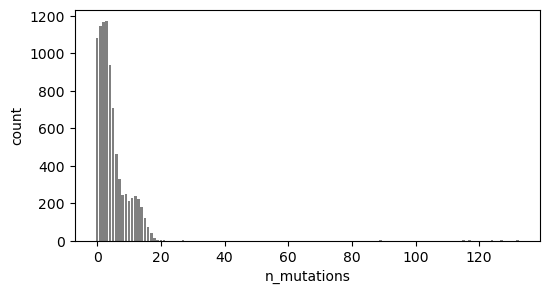

In [24]:
plt.figure(figsize=(6, 3))
sns.countplot(x=df.n_mutations, color="grey", native_scale=True)
plt.show()

Filter the very large mutation sequence as a probable error

In [25]:
(df.n_mutations >= 20).sum()

np.int64(17)

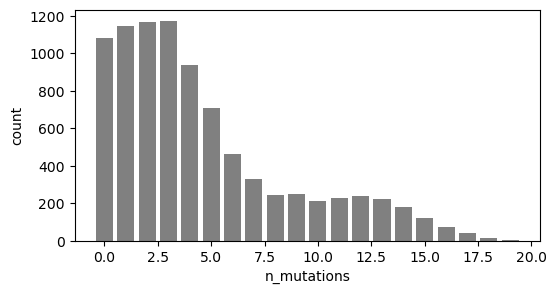

In [26]:
df = df.query("n_mutations < 20").reset_index(drop=True)

plt.figure(figsize=(6, 3))
sns.countplot(x=df.n_mutations, color="grey", native_scale=True)
plt.show()

In [27]:
assert set((df.aa_seq_H + df.aa_seq_L).str.len().unique()) == {len(naive_H) + len(naive_L)}

## Read metadata on mice/times

In [28]:
metadata = pd.read_excel(metadata_sheet)[["Unnamed: 0", "orig.ident", "Timecourse", "Mouse.ID"]]
metadata["barcode"] = metadata["Unnamed: 0"].str.split("_").str[0]
metadata["library"] = metadata["orig.ident"].str[-1].astype(int)
metadata["time (days)"] = metadata.Timecourse.str.split("Day").str[1].astype(int)
metadata["mouse"] = "D" + metadata.Timecourse.str.split("Day").str[-1] + metadata["Mouse.ID"]
metadata.drop(columns=["Unnamed: 0", "orig.ident", "Mouse.ID", "Timecourse"], inplace=True)

metadata

,barcode,library,time (days),mouse
0,AAACCTGAGAATCTCC-1,1,14,D14M1
1,AAACCTGAGCCGCCTA-1,1,8,D8M1
2,AAACCTGAGTGCGTGA-1,1,11,D11M1
3,AAACCTGCAAATACAG-1,1,17,D17M1
4,AAACCTGCAGTACACT-1,1,8,D8M4
...,...,...,...,...
9740,TTTGTCACACGACGAA-1,3,14,D14M3
9741,TTTGTCACATACTACG-1,3,11,D11M3
9742,TTTGTCAGTTCCGTCT-1,3,11,D11M3
9743,TTTGTCATCATGGTCA-1,3,17,D17M4


In [29]:
metadata_10wk = pd.read_excel(metadata_10wk_sheet)[["Unnamed: 0", "hash.ID"]].rename(columns={"Unnamed: 0": "barcode", "hash.ID": "mouse"})
metadata_10wk["library"] = 4
metadata_10wk["time (days)"] = 70
metadata_10wk["time (days)"] = metadata_10wk["time (days)"].astype(int)

number_map = {"One": "1", "Two": "2", "Three": "3", "Four": "4", "Five": "5", "Six": "6", "Seven": "7", "Eight": "8", "Nine": "9"}
metadata_10wk.mouse = metadata_10wk.apply(lambda x: f"D{x['time (days)']}M{number_map[x.mouse]}", axis=1)
# note: barcodes overlap with other libraries
# metadata_10wk.barcode.isin(metadata.barcode).sum()

metadata = pd.concat([metadata, metadata_10wk]).reset_index(drop=True)
metadata

,barcode,library,time (days),mouse
0,AAACCTGAGAATCTCC-1,1,14,D14M1
1,AAACCTGAGCCGCCTA-1,1,8,D8M1
2,AAACCTGAGTGCGTGA-1,1,11,D11M1
3,AAACCTGCAAATACAG-1,1,17,D17M1
4,AAACCTGCAGTACACT-1,1,8,D8M4
...,...,...,...,...
12412,TTTGGTTTCGGCATCG-1,4,70,D70M8
12413,TTTGGTTTCTCCCTGA-1,4,70,D70M6
12414,TTTGTCAAGCGGCTTC-1,4,70,D70M8
12415,TTTGTCAAGTAGGTGC-1,4,70,D70M9


Merge with sequence data on barcode and library

In [30]:
df = df.merge(metadata, how="inner", on=["barcode", "library"])
df

,barcode,is_cell_H,contig_id_H,high_confidence_H,length_H,chain_H,v_gene_H,d_gene_H,j_gene_H,c_gene_H,...,mutations_L,n_mutations_L,delta_bind_CGG_L,delta_expr_L,delta_bind_CGG,delta_expr,n_mutations,nt_seq,time (days),mouse
0,AAACCTGAGAATCTCC-1,True,AAACCTGAGAATCTCC-1_contig_2,True,527,IGH,IGHV3-8,NaN,IGHJ1,IGHG2B,...,A40(L)G,1,0.80414,0.03813,0.80353,0.01580,2,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,14,D14M1
1,AAACCTGAGCCGCCTA-1,True,AAACCTGAGCCGCCTA-1_contig_2,True,542,IGH,IGHV3-8,NaN,IGHJ1,IGHG1,...,,0,0.00000,0.00000,0.00000,0.00000,0,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,8,D8M1
2,AAACCTGCAGTACACT-1,True,AAACCTGCAGTACACT-1_contig_1,True,671,IGH,IGHV3-8,NaN,IGHJ1,IGHM,...,,0,0.00000,0.00000,0.00000,0.00000,0,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,8,D8M4
3,AAACCTGGTCCGACGT-1,True,AAACCTGGTCCGACGT-1_contig_1,True,661,IGH,IGHV3-8,NaN,IGHJ1,IGHM,...,A40(L)G,1,0.80414,0.03813,0.80414,0.03813,1,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,11,D11M1
4,AAACCTGTCTTAACCT-1,True,AAACCTGTCTTAACCT-1_contig_1,True,672,IGH,IGHV3-8,NaN,IGHJ1,IGHM,...,,0,0.00000,0.00000,0.00000,0.00000,0,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,11,D11M1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6901,TTTGGTTCAATGCCAT-1,True,TTTGGTTCAATGCCAT-1_contig_2,True,551,IGH,IGHV3-8,NaN,IGHJ1,IGHG2B,...,"A40(L)G,Y42(L)F,R67(L)K,S92(L)N,E101(L)D",5,0.83727,0.03068,-2.20291,-0.12903,10,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCCTCTC...,70,D70M5
6902,TTTGGTTGTACCTACA-1,True,TTTGGTTGTACCTACA-1_contig_1,True,540,IGH,IGHV3-8,NaN,IGHJ1,IGHG1,...,"A40(L)G,K45(L)R,E101(L)D,L116(L)V,K123(L)N",5,0.82735,0.12580,0.95721,-0.22171,14,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,70,D70M6
6903,TTTGGTTTCAGCCTAA-1,True,TTTGGTTTCAGCCTAA-1_contig_2,True,460,IGH,IGHV3-8,NaN,IGHJ1,NaN,...,"Y42(L)F,A52(L)S,A57(L)T,S92(L)N,Q105(L)H,S109(...",7,1.80824,-0.01487,3.64011,-0.16171,14,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,70,D70M9
6904,TTTGGTTTCTCCCTGA-1,True,TTTGGTTTCTCCCTGA-1_contig_2,True,473,IGH,IGHV3-8,NaN,IGHJ1,NaN,...,"S7(L)P,Y42(L)F,A52(L)V,D74(L)G,Q105(L)H,N108(L...",7,1.07204,-0.02940,2.35357,-0.18553,11,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,70,D70M6


## Filter data

Here's the pre-filtered data

In [31]:
mouse_labels = sorted(df.mouse.str.split("M").str[1].unique())

In [32]:
filter_dict = {
    "1": np.inf,  # remove this GC with only one cell
    "2": np.inf, # no filter
    "3": 1,
    "4": 1,
    "5": 0,
    "6": 1.0,
    "7": 0,
    "8": 0,
    "9": .7,
}

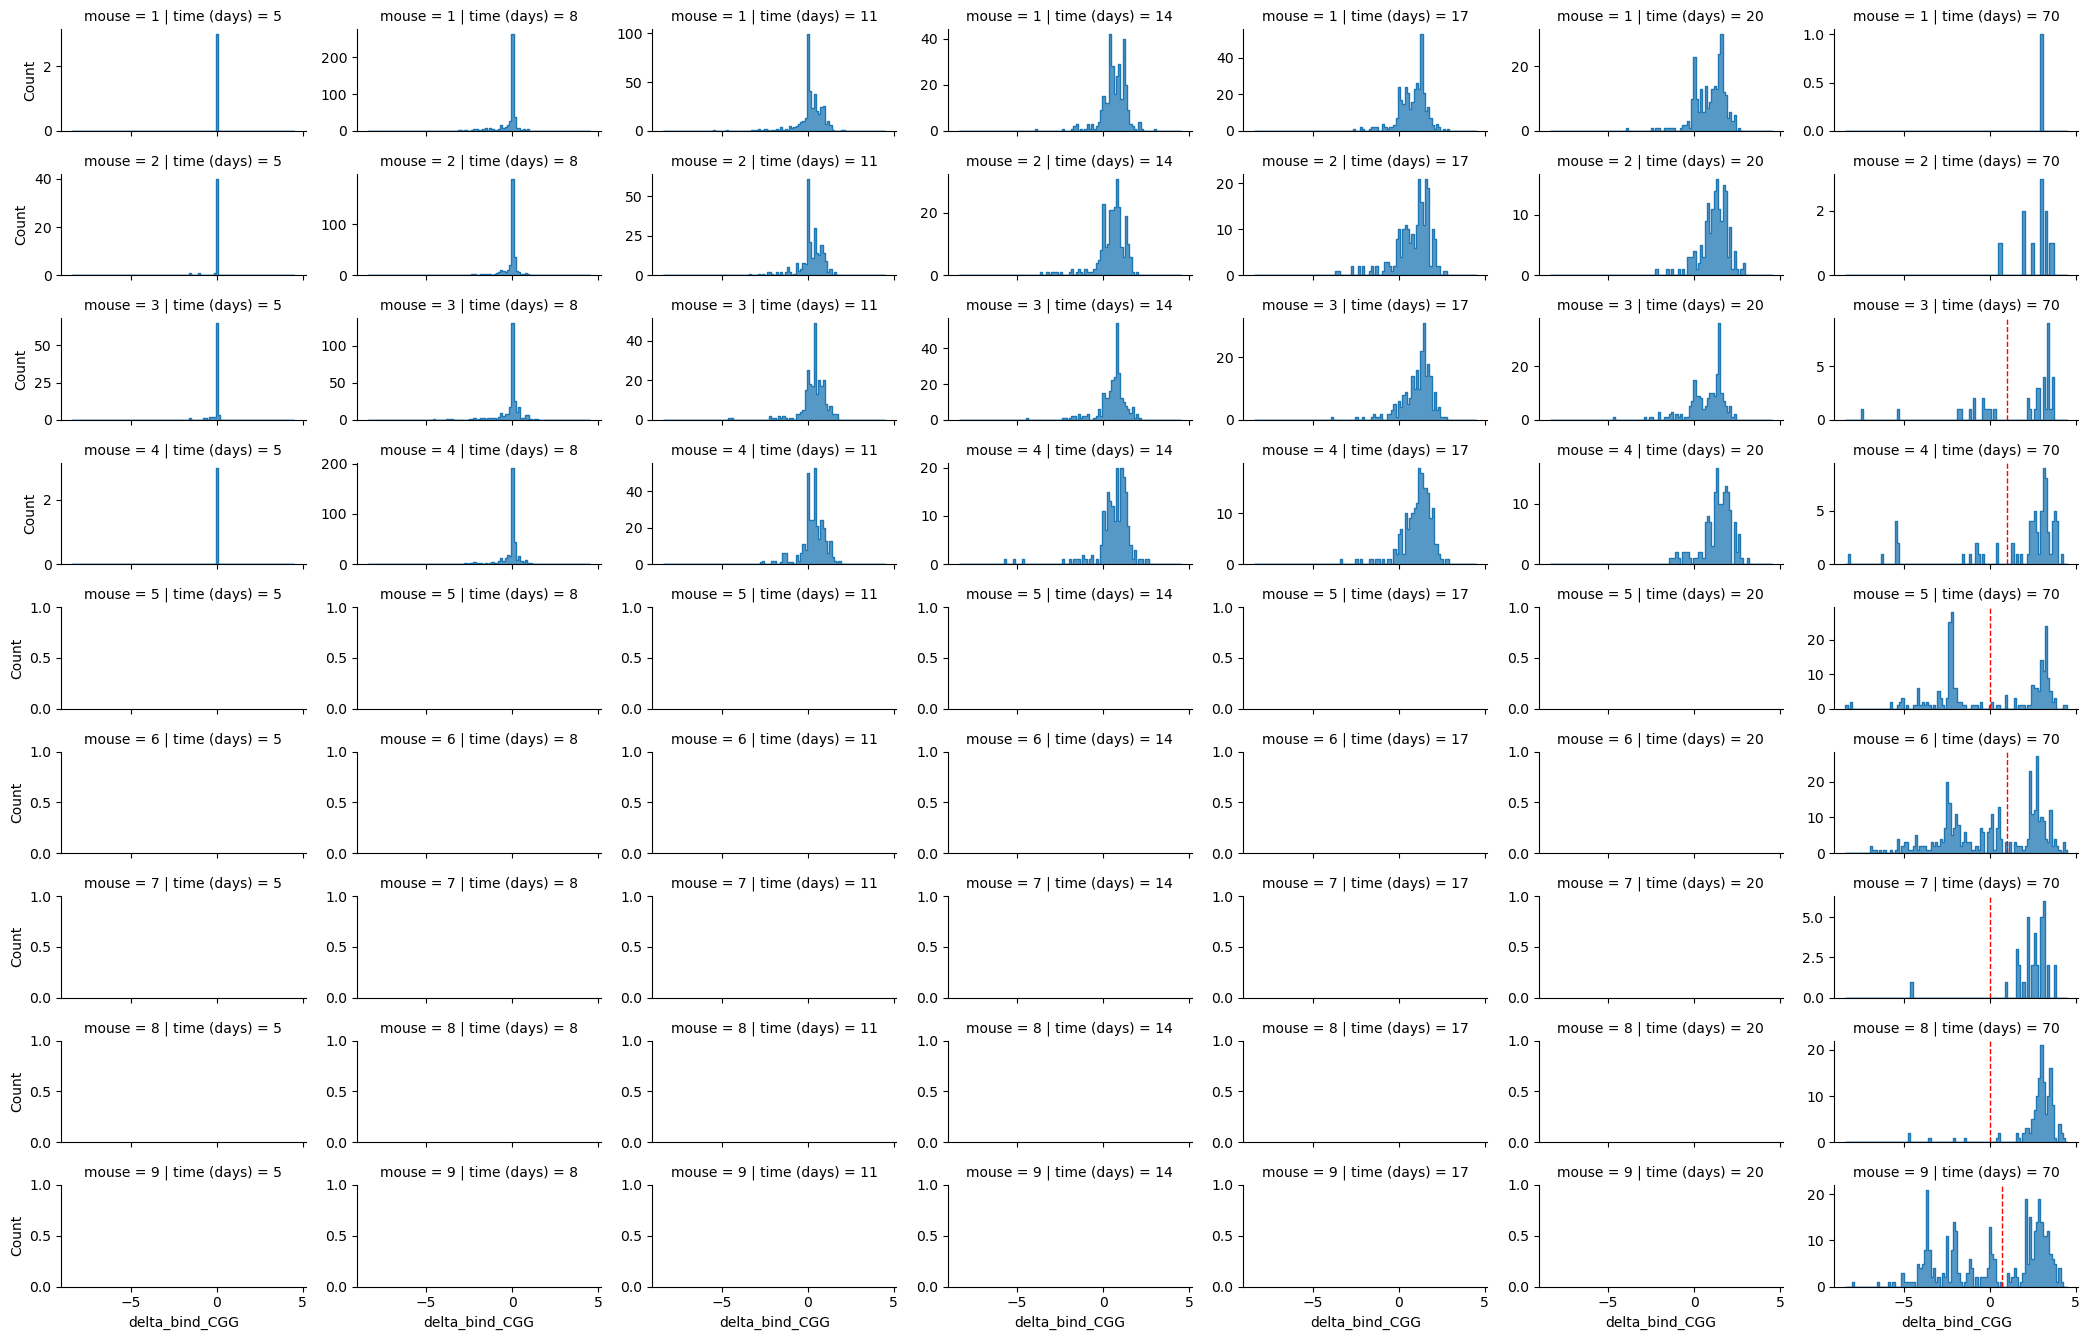

In [33]:
g = sns.displot(data=df, x="delta_bind_CGG", row=df.mouse.str[-1], row_order=mouse_labels, col="time (days)", element="step", height=1.5, aspect=2, facet_kws=dict(sharey=False))
g.map(plt.axvline, x=0, color="k", linestyle="--", lw=1)
for mouse in filter_dict:
    g.axes_dict[(mouse, 70)].axvline(x=filter_dict[mouse], color="r", linestyle="--", lw=1)
plt.show()

In [34]:
# we apply thresholds and also remove two low-cell-count mice
df_filter = ((df["time (days)"] < 70) | (df.delta_bind_CGG >= pd.Series(filter_dict).reindex(df.mouse.str[-1]).values)) & ~(df.mouse.isin(["D5M1", "D5M4"]))
print(f"Filtering to keep {df_filter.sum()/len(df):.2%} of cells")
df = df[df_filter].reset_index(drop=True)

Filtering to keep 91.82% of cells


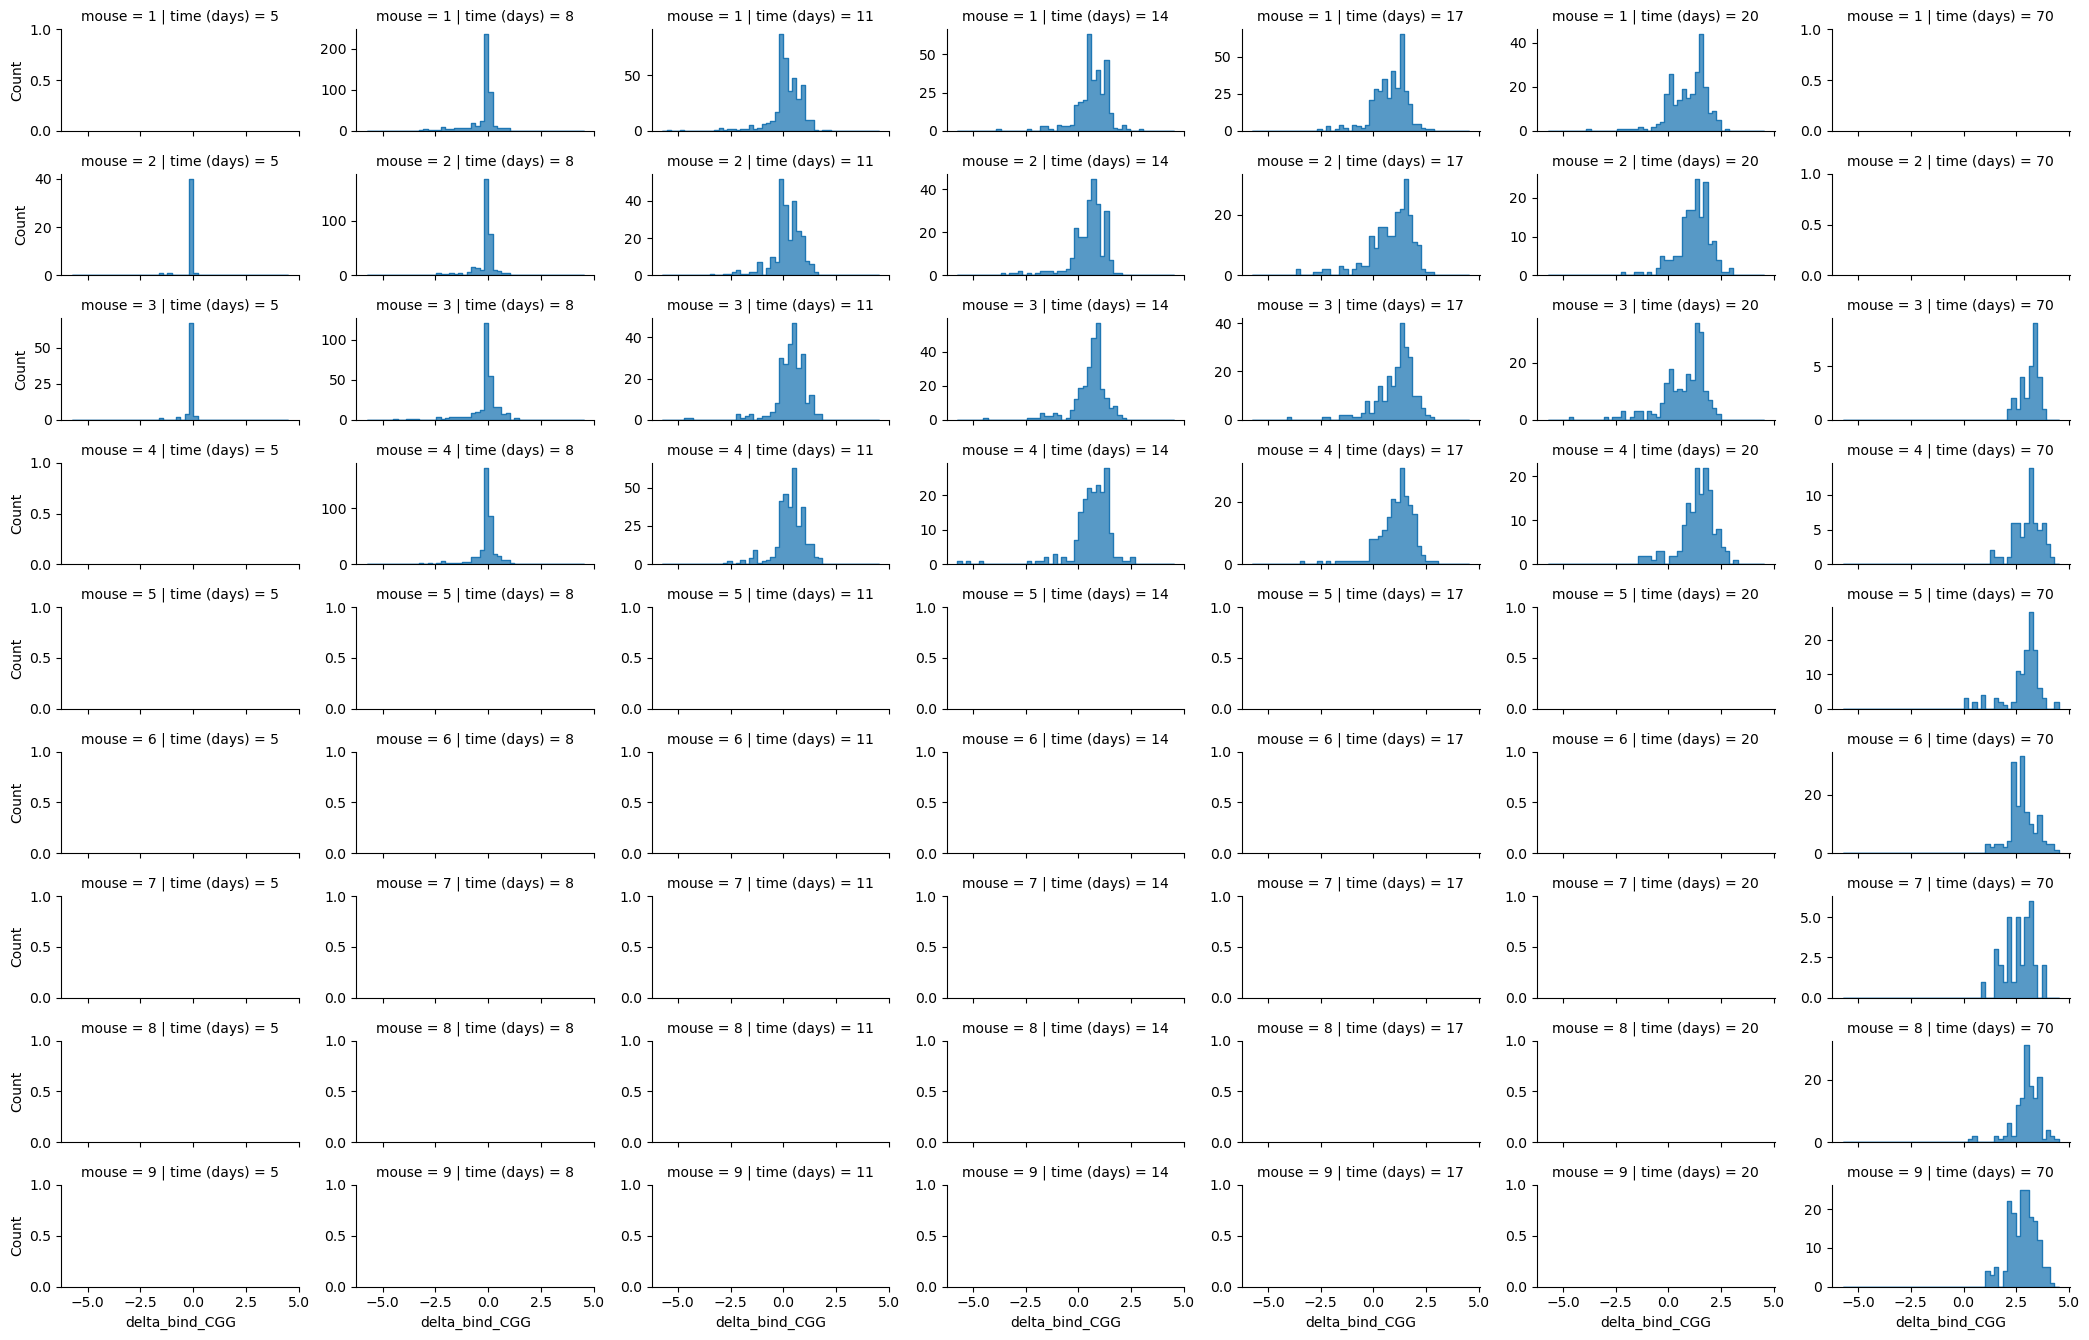

In [35]:
g = sns.displot(data=df, x="delta_bind_CGG", row=df.mouse.str[-1], row_order=mouse_labels, col="time (days)", bins=50, element="step", height=1.5, aspect=2, facet_kws=dict(sharey=False))
g.map(plt.axvline, x=0, color="k", linestyle="--", lw=1)
plt.show()

In [36]:
summary_stats = df.groupby(["time (days)", "mouse"]).delta_bind_CGG.aggregate(["size", "median", "mean", "var"])
summary_stats["affinity Q1"] = df.groupby(["time (days)", "mouse"]).delta_bind_CGG.quantile(0.25)
summary_stats["affinity Q3"] = df.groupby(["time (days)", "mouse"]).delta_bind_CGG.quantile(0.75)

# rename columns
summary_stats.rename(columns={"size": "n cells", "median": "affinity median", "mean": "affinity mean", "var": "affinity variance"}, inplace=True)

# drop samples with too few cells, or too much affinity variance
# summary_stats = summary_stats.loc[(summary_stats["n cells"] >= 30) & ((summary_stats.index.get_level_values("time (days)") != 70) | (summary_stats["affinity Q1"] > 1))]
summary_stats = summary_stats.loc[(summary_stats["n cells"] >= 30)]

summary_stats

n cells  affinity median  affinity mean  affinity variance  \
time (days) mouse                                                               
5           D5M2        43         0.000000      -0.062645           0.079083   
            D5M3        77         0.000000      -0.052628           0.048427   
8           D8M1       477         0.000000      -0.232351           0.465122   
            D8M2       344         0.000000      -0.137126           0.290532   
            D8M3       284         0.000000      -0.121898           0.507979   
            D8M4       394         0.000000      -0.128140           0.406892   
11          D11M1      395         0.127290       0.123421           0.688396   
            D11M2      252         0.138915       0.147934           0.565103   
            D11M3      252         0.443065       0.331539           0.606242   
            D11M4      326         0.395085       0.303010           0.509102   
14          D14M1      306         0.708880       0.645691           0.531020   
            D14M2      248         0.630470       0.465481           0.713849   
            D14M3      263         0.756860       0.559910           0.626395   
            D14M4      188         0.804140       0.612569           1.083628   
17          D17M1      350         0.965135       0.796658           0.630528   
            D17M2      225         1.136030       0.844177           1.143461   
            D17M3      233         1.282010       1.047178           0.821544   
            D17M4      203         1.229850       1.058029           0.768708   
20          D20M1      252         1.080685       0.898227           0.846566   
            D20M2      167         1.272010       1.174536           0.636855   
            D20M3      206         1.024170       0.725213           1.103523   
            D20M4      155         1.467880       1.334545           0.733741   
70          D70M4       62         3.171205       3.056717           0.396627   
            D70M5      111         3.105880       2.838753           0.714509   
            D70M6      152         2.754565       2.788481           0.389352   
            D70M7       35         2.652180       2.614958           0.458773   
            D70M8      134         3.066100       3.018032           0.410780   
            D70M9      178         2.827140       2.780362           0.413501   

                   affinity Q1  affinity Q3  
time (days) mouse                            
5           D5M2      0.000000     0.000000  
            D5M3      0.000000     0.000000  
8           D8M1     -0.156170     0.014270  
            D8M2     -0.051900     0.036008  
            D8M3     -0.085508     0.123008  
            D8M4     -0.078368     0.080357  
11          D11M1     0.000000     0.564395  
            D11M2     0.000000     0.592993  
            D11M3     0.042997     0.774530  
            D11M4     0.002258     0.774938  
14          D14M1     0.387400     1.169960  
            D14M2     0.126388     0.904470  
            D14M3     0.259380     0.919840  
            D14M4     0.306667     1.151768  
17          D17M1     0.337895     1.305940  
            D17M2     0.314380     1.553650  
            D17M3     0.675850     1.613480  
            D17M4     0.675785     1.591585  
20          D20M1     0.299385     1.567645  
            D20M2     0.799405     1.693255  
            D20M3     0.139900     1.451183  
            D20M4     0.956525     1.887410  
70          D70M4     2.648600     3.415703  
            D70M5     2.676165     3.283785  
            D70M6     2.399650     3.116487  
            D70M7     2.198210     3.109680  
            D70M8     2.765752     3.431065  
            D70M9     2.332010     3.228372

In [37]:
df.groupby("time (days)").size()

time (days)
5      120
8     1499
11    1225
14    1005
17    1011
20     780
70     701
dtype: int64

In [38]:
df.groupby(["time (days)", "mouse"]).size()

time (days)  mouse
5            D5M2      43
             D5M3      77
8            D8M1     477
             D8M2     344
             D8M3     284
             D8M4     394
11           D11M1    395
             D11M2    252
             D11M3    252
             D11M4    326
14           D14M1    306
             D14M2    248
             D14M3    263
             D14M4    188
17           D17M1    350
             D17M2    225
             D17M3    233
             D17M4    203
20           D20M1    252
             D20M2    167
             D20M3    206
             D20M4    155
70           D70M3     29
             D70M4     62
             D70M5    111
             D70M6    152
             D70M7     35
             D70M8    134
             D70M9    178
dtype: int64

## Affinity distributions

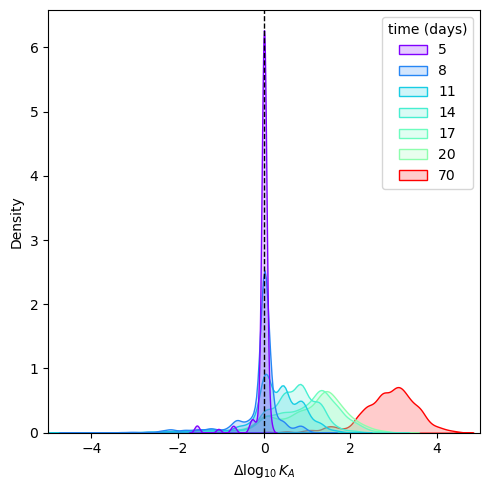

In [39]:
plt.figure(figsize=(5, 5))
sns.kdeplot(data=df, x="delta_bind_CGG", hue="time (days)",
            palette="rainbow",
            common_norm=False, common_grid=False,
            hue_norm=matplotlib.colors.LogNorm(vmin=df["time (days)"].min(), vmax=df["time (days)"].max()),
            fill=True, alpha=0.2,
            bw_adjust=0.6
            )
plt.axvline(0, color="k", linestyle="--", lw=1)
plt.xlim(-5, 5)
plt.xlabel("$\Delta\log_{10} K_A$")
plt.tight_layout()
plt.savefig(f"{output_dir}/affinity_kde.pdf")
plt.show()

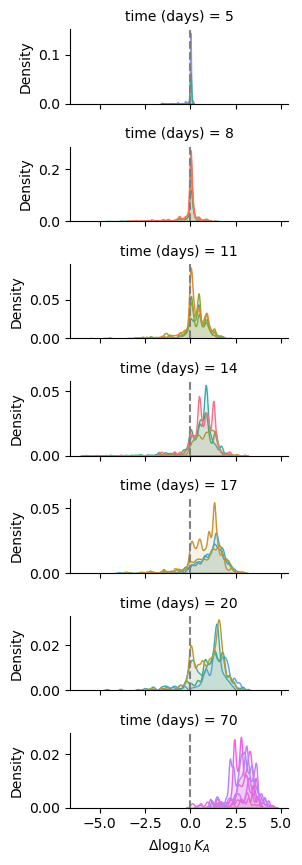

In [40]:
g = sns.displot(data=df, kind="kde", x="delta_bind_CGG", row="time (days)", hue="mouse", fill=True, facet_kws={'sharey': False},
                common_norm=True,
                alpha=0.1, bw_adjust=0.3,
                height=1.25, aspect=2.5, legend=False)
# plt.xlim(-3, 3)
plt.xlabel(r"$\Delta\log_{10} K_A$")
for ax in g.axes.flatten():
    ax.axvline(0, color="grey", linestyle="--")
plt.tight_layout()
plt.savefig(f"{output_dir}/affinity_kde_stratified.pdf")
plt.show()

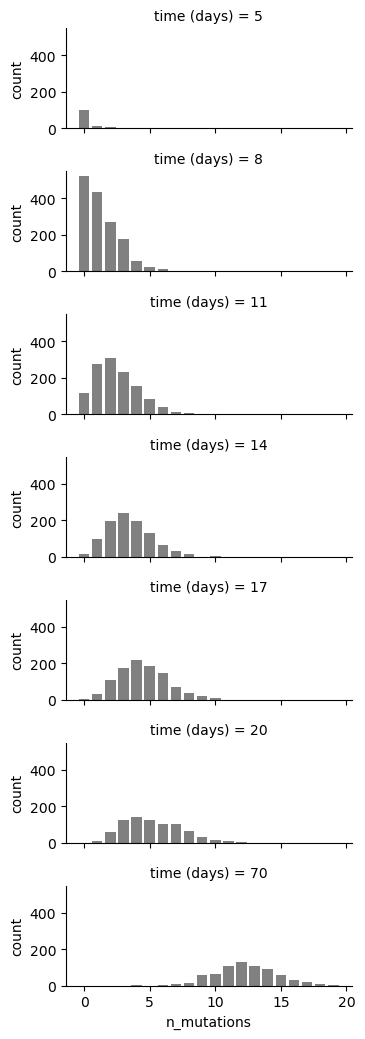

In [41]:
sns.catplot(kind="count", data=df, x="n_mutations", row="time (days)", color="grey", native_scale=True, aspect=2.5, height=1.5, legend=False)
plt.show()

In [42]:
df.groupby("time (days)").delta_bind_CGG.mean()

time (days)
5    -0.056217
8    -0.162181
11    0.219069
14    0.572577
17    0.917451
20    0.998396
70    2.868209
Name: delta_bind_CGG, dtype: float64

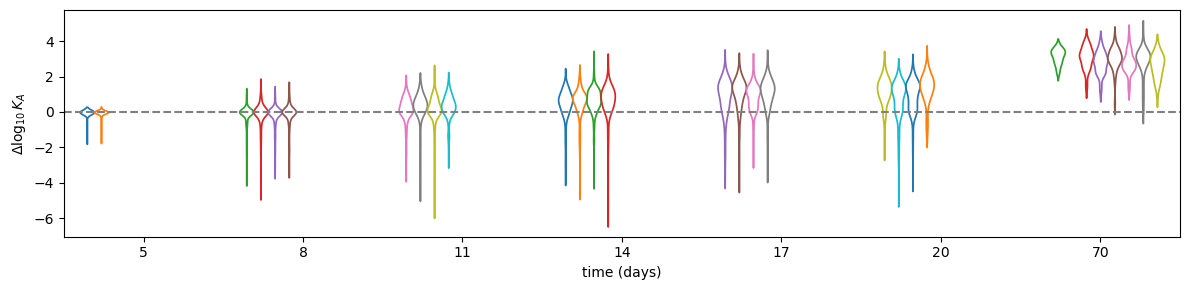

In [43]:
plt.figure(figsize=(12, 3))
ax = sns.violinplot(data=df, y="delta_bind_CGG", x="time (days)",
                    hue=df.mouse.str.split("M").str[-1],
                    dodge=True,
                    inner=None,
                    common_norm=True,
                    density_norm="width",
                    # linewidth=1,
                    # width=1.0,
                    # bw_method=0.3,
                    )
for i, coll in enumerate(ax.collections):
    coll.set_facecolor((0, 0, 0, 0))
    coll.set_edgecolor(f"C{i}")
# sns.lineplot(data=df.groupby("time (days)").delta_bind_CGG.median().loc[order],
#              color="black", linewidth=2)
plt.axhline(0, color="grey", linestyle="--")
# put more space on the right
# plt.xlim(-0.5, 5.5)
# plt.ylim(-5, 5)
plt.ylabel(r"$\Delta\log_{10} K_A$")
plt.legend().remove()
plt.tight_layout()
plt.savefig(f"{output_dir}/affinity_violin.pdf")
plt.show()

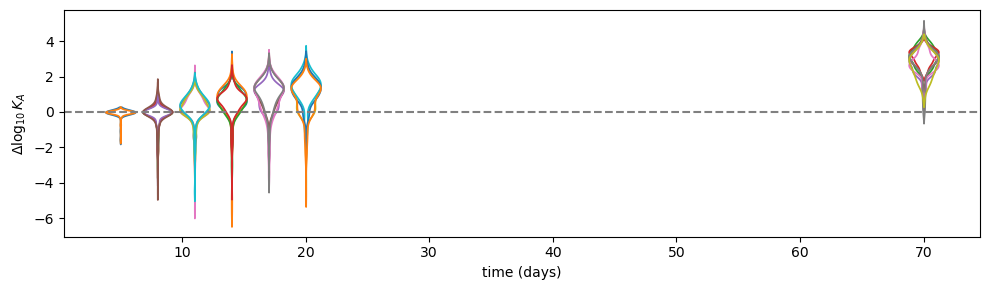

In [44]:
plt.figure(figsize=(10, 3))
ax = sns.violinplot(data=df, y="delta_bind_CGG", x="time (days)",
                    hue=df.mouse.str.split("M").str[-1],
                    dodge=False,
                    inner=None,
                    common_norm=True,
                    density_norm="width",
                    native_scale=True,
                    # linewidth=1,
                    # width=1.0,
                    # bw_method=0.3,
                    )
for i, coll in enumerate(ax.collections):
    coll.set_facecolor((0, 0, 0, 0))
    coll.set_edgecolor(f"C{i}")
# sns.lineplot(data=df.groupby("time (days)").delta_bind_CGG.median().loc[order],
#              color="black", linewidth=2)
plt.axhline(0, color="grey", linestyle="--")
# put more space on the right
# plt.xlim(-0.5, 5.5)
# plt.ylim(-5, 5)
plt.ylabel("$\Delta\log_{10} K_A$")
plt.legend().remove()
plt.tight_layout()
plt.savefig(f"{output_dir}/affinity_violin2.pdf")
plt.show()

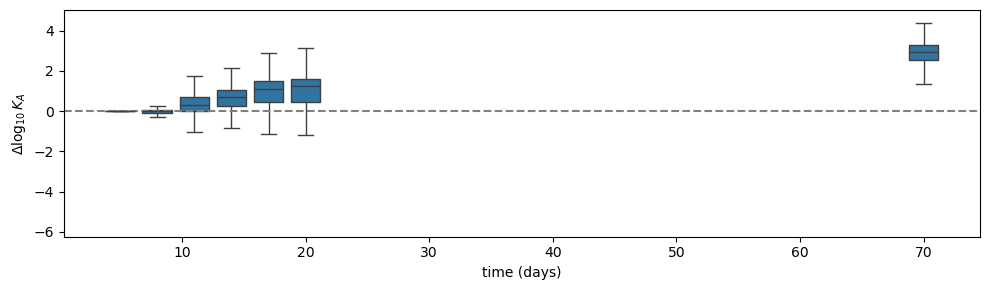

In [45]:
plt.figure(figsize=(10, 3))
ax = sns.boxplot(data=df, y="delta_bind_CGG", x="time (days)",
                #  hue=df.mouse.str.split("M").str[-1],
                 fliersize=0,
                #  dodge=True,
                native_scale=True,
                 )
for i, coll in enumerate(ax.collections):
    coll.set_facecolor((0, 0, 0, 0))
    coll.set_edgecolor(f"C{i}")
# sns.lineplot(data=df.groupby("time (days)").delta_bind_CGG.median().loc[order],
#              color="black", linewidth=2)
plt.axhline(0, color="grey", linestyle="--")
# put more space on the right
# plt.xlim(-0.5, 5.5)
# plt.ylim(-2, 3)
plt.ylabel(r"$\Delta\log_{10} K_A$")
# plt.legend().remove()
plt.tight_layout()
plt.show()

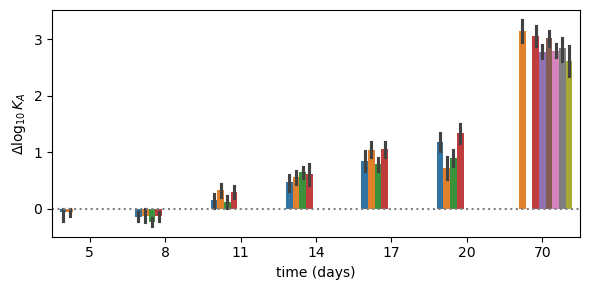

In [46]:
# plot mean of each mouse at each time
plt.figure(figsize=(6, 3))
sns.barplot(data=df, x="time (days)", y="delta_bind_CGG",
            errorbar=("ci", 99),
            hue=df.mouse.str.split("M").str[-1],
            # palette='light:C0',
            # palette="dark:lightgrey",
            )
plt.legend().remove()
plt.axhline(0, color="grey", linestyle=":")
plt.ylabel(r"$\Delta\log_{10} K_A$")
plt.tight_layout()
plt.savefig(f"{output_dir}/affinity_bar.pdf")
plt.show()

In [47]:
summary_df = df.groupby(["mouse", "time (days)"]).aggregate({"delta_bind_CGG": [np.mean, np.std, "size"]}).sort_values("time (days)")
summary_df.columns = ["mean", "std", "n"]
summary_df.to_csv(f"{output_dir}/affinity_mean_std.csv")

/tmp/ipykernel_201/423132769.py:1: FutureWarning: The provided callable <function mean at 0x14a820f24040> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  summary_df = df.groupby(["mouse", "time (days)"]).aggregate({"delta_bind_CGG": [np.mean, np.std, "size"]}).sort_values("time (days)")
/tmp/ipykernel_201/423132769.py:1: FutureWarning: The provided callable <function std at 0x14a820f24160> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  summary_df = df.groupby(["mouse", "time (days)"]).aggregate({"delta_bind_CGG": [np.mean, np.std, "size"]}).sort_values("time (days)")


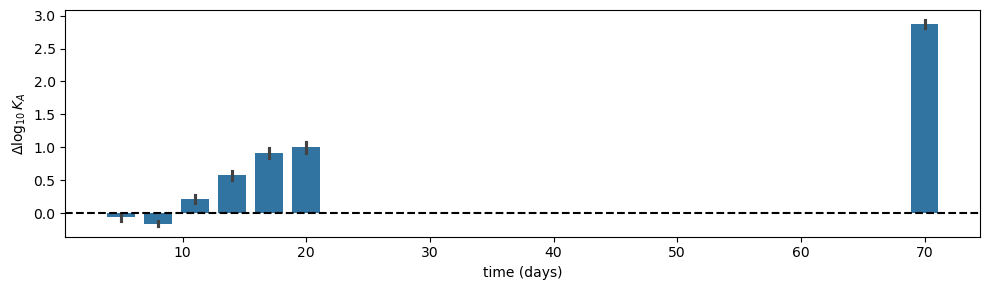

In [48]:
plt.figure(figsize=(10, 3))
ax = sns.barplot(data=df, y="delta_bind_CGG", x="time (days)",
                #  hue=df.mouse.str.split("M").str[-1],
                 errorbar=("ci", 99),
                #  fliersize=0,
                #  dodge=True,
                width=0.75,
                native_scale=True,
                 )
for i, coll in enumerate(ax.collections):
    coll.set_facecolor((0, 0, 0, 0))
    coll.set_edgecolor(f"C{i}")
# sns.lineplot(data=df.groupby("time (days)").delta_bind_CGG.median().loc[order],
#              color="black", linewidth=2)
plt.axhline(0, color="k", linestyle="--")
plt.ylabel("$\Delta\log_{10} K_A$")
# plt.legend().remove()
plt.tight_layout()
plt.savefig(f"{output_dir}/affinity_bar_agg.pdf")
plt.show()

In [49]:
df.groupby("mouse").size()

mouse
D11M1    395
D11M2    252
D11M3    252
D11M4    326
D14M1    306
D14M2    248
D14M3    263
D14M4    188
D17M1    350
D17M2    225
D17M3    233
D17M4    203
D20M1    252
D20M2    167
D20M3    206
D20M4    155
D5M2      43
D5M3      77
D70M3     29
D70M4     62
D70M5    111
D70M6    152
D70M7     35
D70M8    134
D70M9    178
D8M1     477
D8M2     344
D8M3     284
D8M4     394
dtype: int64

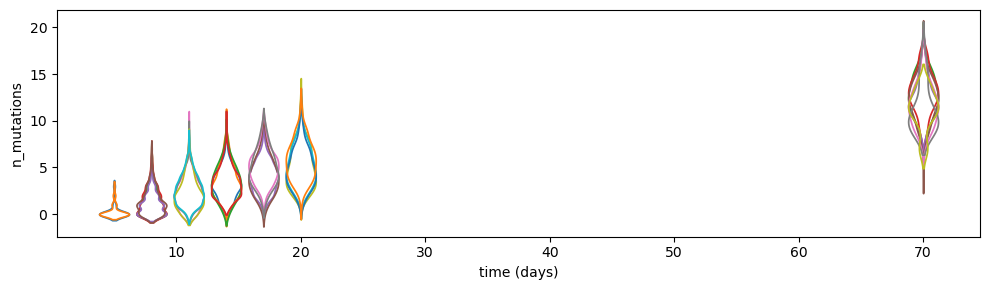

In [50]:
plt.figure(figsize=(10, 3))
ax = sns.violinplot(data=df, y=df.n_mutations.astype(float), x="time (days)", hue=df.mouse, dodge=False, inner=None, native_scale=True)
for i, coll in enumerate(ax.collections):
    coll.set_facecolor((0, 0, 0, 0))
    coll.set_edgecolor(f"C{i}")
plt.legend().remove()
plt.tight_layout()
plt.savefig(f"{output_dir}/mutations_violin.pdf")
plt.show()

### Plots using number of mutations instead of time

In [51]:
df["n_mutations_chunked"] = df.n_mutations.map(lambda x: f"{x}" if x < 8 else "8+")

In [52]:
foo_order = sorted(df["n_mutations_chunked"].unique(), key=lambda x: int(x.split("+")[0]))

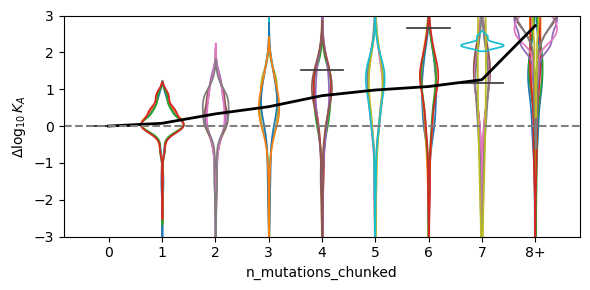

In [53]:
plt.figure(figsize=(6, 3))
ax = sns.violinplot(data=df, y="delta_bind_CGG", x="n_mutations_chunked", order=foo_order, hue=df.mouse.str.split("M").str[-1], dodge=False, inner=None)
for i, coll in enumerate(ax.collections):
    coll.set_facecolor((0, 0, 0, 0))
    coll.set_edgecolor(f"C{i}")
sns.lineplot(data=df.groupby("n_mutations_chunked").delta_bind_CGG.median(),
             color="black", linewidth=2)
plt.axhline(0, color="grey", linestyle="--")
# put more space on the right
# plt.xlim(-0.5, 5.5)
plt.ylim(-3, 3)
plt.ylabel("$\Delta\log_{10} K_A$")
plt.legend().remove()
plt.tight_layout()
plt.savefig(f"{output_dir}/affinity_violin_mutations.pdf")
plt.show()

/tmp/ipykernel_201/2875158406.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x="delta_bind_CGG", hue="n_mutations_chunked", hue_order=foo_order, fill=True, common_norm=False, alpha=0.1, bw_adjust=0.6)


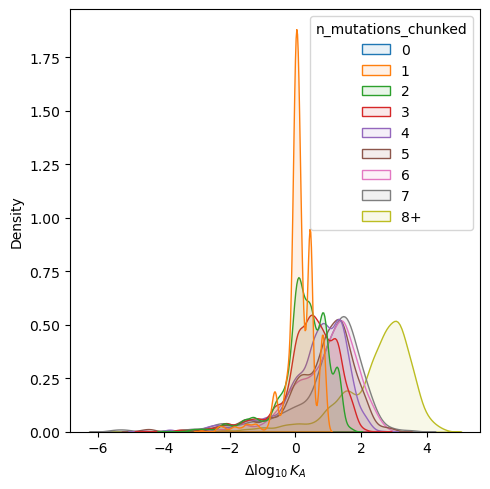

In [54]:
plt.figure(figsize=(5, 5))
sns.kdeplot(data=df, x="delta_bind_CGG", hue="n_mutations_chunked", hue_order=foo_order, fill=True, common_norm=False, alpha=0.1, bw_adjust=0.6)
# plt.xlim(-3, 3)
plt.xlabel("$\Delta\log_{10} K_A$")
plt.tight_layout()
plt.savefig(f"{output_dir}/affinity_kde_mutations.pdf")
plt.show()

## Write data frame to file

In [55]:
df.to_csv(f"{output_dir}/data.csv", index=False)